# Image Classification with Hugging Face





In this project you'll explore the capabilities of Visual Transformers (ViT) for various image understanding tasks. It aims to demonstrate the versatility of ViT models by showcasing their performance in simple image classification, zero-shot image classification, and zero-shot object detection tasks. By the end of the project you'll understand the potential of ViT models in handling diverse image-related challenges.

- Simple Image Classification: This task involves training a ViT model to classify images into predefined categories. It serves as a foundational example of using ViT for image understanding.
- Zero-Shot Image Classification: Here, the project explores the ViT model's ability to classify images into categories it has never seen during training. This task demonstrates the model's capability to generalize to new classes, a crucial skill in real-world scenarios.
- Zero-Shot Object Detection: This task goes beyond classification and involves localizing and identifying objects within images, even if the model has never encountered those objects during training. It showcases the ViT model's potential for object detection in novel contexts.

The intended audience for this project targets individuals with an intermediate to advanced level of knowledge in machine learning and computer vision. This may include data scientists, machine learning engineers, computer vision researchers, or anyone interested in exploring the capabilities of state-of-the-art ViT models for image-related tasks. The project assumes a basic understanding of deep learning concepts and coding proficiency in Python. 

## Task 0: Setup

For this image classification task we need the `transformers`, `image` and `requests` Python packages in order to work with pre-trained transformer-based models, including the Visual Transformer (ViT) model.


### Instructions

Import the following packages.

- From the `transformers` package, import `ViTFeatureExtractor` and `ViTForImageClassification`. 
- From the `PIL` package, import `Image` and `Markdown`.
- import requests.
- import matplotlib.

In [3]:
# From the transformers package, import ViTFeatureExtractor and ViTForImageClassification
from transformers import ViTFeatureExtractor, ViTForImageClassification

# From the PIL package, import Image and Markdown
from PIL import Image

# import requests
import requests

# import torch
import torch

# import matplotlib
import matplotlib.pyplot as plt

## Task 1: Image Classification - Loading Vision Transformer

In this task, we initialize both the feature extractor and the pre-trained ViT model for image classification task. In this case, we're using the `'vit-base-patch16-224'` model, which is a popular choice for various computer vision tasks. It has a patch size of `16x16` pixels and is trained on `224x224` pixel images. <br> In computer vision, `patch size` refers to the dimensions or size of a rectangular region or "patch" that is extracted from an image. This patch typically contains a subset of the pixels from the original image and is used for various computer vision tasks, including feature extraction, object detection, image classification, and image processing.

After loading the model and feature extractor, you'll have both the feature extractor, you can then proceed to load images, preprocess them using the feature extractor, and pass them through the model for image classification or any other related tasks. 

### Instructions

Image Classification - Loading Vision Transformer

- Load the feature extractor for the vision transformer
- Load the pre-trained weights from vision transformer

In [3]:
# Load the feature extractor for the vision transformer
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

# Load the pre-trained weights from vision transformer
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/346M [00:00<?, ?B/s]

## Task 2: Image Classification - Generate features from an Image


In the previous task, we loaded the feature extractor and pretrained model vision transformer. This task involves the process of extracting features from an image using a pre-trained Visual Transformer (ViT) model. Extracting meaningful features from an image is a crucial step in many computer vision tasks. These features serve as a representation of the image that can be used for tasks such as image classification, object detection, image captioning, and more. <br>

We use `plt.imread()` function to read the image for further processing. We use `feature_extractor()` function which takes the image as input and extracts the features needed for the ViT model. The `return_tensors="pt"` argument specifies that the features should be returned as PyTorch tensors, making them suitable for input to the ViT model.


### Instructions

Generate features from an Image

- Save the image to your workspace that you want to extract features from
- Read the image from the workspace using the matplotlib library
- Display image
- Extract features from the image using the feature extractor


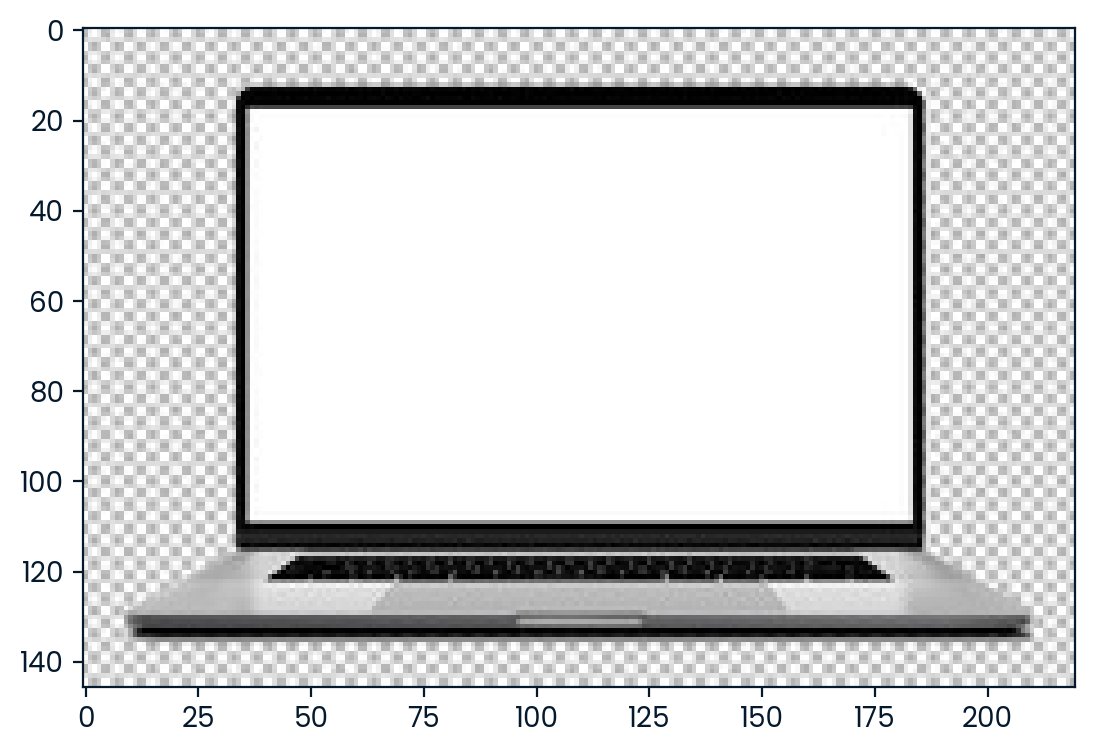

In [4]:
# Read the image from the workspace using the matplotlib library
image = plt.imread("laptop.jpeg")

# Display image
plt.imshow(image)

In [5]:
# Extract features from the image using the feature extractor
inputs = feature_extractor(images=image, return_tensors="pt")

## Task 3: Image Classification - Make Predictions


In the previous task, we learned about functions that can help us extract features from an image. In this task, we are making predictions for the image using the pre-trained Visual Transformer (ViT) model. <br>

We first create a variable holds the pixel values of the image that we extracted using the feature extractor in the previous step. We then pass the pixel_values to the ViT model to generate model's predictions and additional information, such as logits, and class probabilities. This is an important task since in many real-world applications, machine learning models are used to provide insights or make decisions. Being able to display the predicted class name in a user-friendly manner is essential for communicating the model's findings to stakeholders, end-users, or decision-makers.

### Instructions

Make Predictions

- Extracted pixel values from the image 
- Make predictions using the ViT model
- Get the logits (raw scores) for different classes
- Determine the number of classes
- Find the index of the predicted class with the highest probability
- Display the index of the class
- Extract the class name using the model's configuration
- Display the predicted class name

In [14]:
# Extracted pixel values from the image
pixel_values= inputs['pixel_values']
print (pixel_values.shape)


# Make predictions using the ViT model
output=model(pixel_values)


torch.Size([1, 3, 224, 224])


In [13]:
# Get the logits (raw scores) for different classes
logits =output.logits 

# Determine the number of classes
print(logits.shape)


torch.Size([1, 1000])


In [18]:
# Find the index of the predicted class with the highest probability
predicted_class_idx = logits.argmax(-1).item()

# Display the index of the class
print(predicted_class_idx)

681


In [22]:
# Extract the class name using the model's configuration
predicted_class = model.config.id2label[predicted_class_idx]

# Display the predicted class name
predicted_class 

'notebook, notebook computer'

## Task 4: Zero-shot Image Classification - Loading Models

In the previous task, we learned about simple image classification task using vision transformers. In this task, we will learn to load pre-trained models for zero-shot image classification task. Zero-shot image classification allows a model to classify images into categories it has never seen during training. This is crucial for real-world applications where new categories may constantly emerge, and it's not feasible to retrain the model every time new categories are introduced. In this task, we use `"openai/clip-vit-large-patch14"` models because they excel at zero-shot and few-shot learning tasks. With a simple textual description or prompt, you can use these models to classify images into categories that were not seen during training. This is valuable when you have limited labeled data for image classification tasks.<br>

We load the necessary classes from the transformers library to work with a pre-trained model for zero-shot image classification. We also load the processors, which are responsible for tokenizing and preprocessing inputs to make them compatible with the model. In this case, we're using the AutoProcessor to handle text inputs and image inputs for zero-shot classification. With these components initialized, we can now use this pre-trained model and processor to perform zero-shot image classification, where the model can classify images into classes it has never seen during training based on textual descriptions or labels.

### Instructions

Loading Models

- Load a pre-trained model  
- Specify the checkpoint name or identifier for the pre-trained model you want to use
- Initialize the pre-trained model for zero-shot image classification
- Initializes the processor associated with the same pre-trained model

In [1]:
# Load a pre-trained model
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

# Specify the checkpoint name or identifier for the pre-trained model you want to use
checkpoint = "openai/clip-vit-large-patch14"

# Initialize the pre-trained model for zero-shot image classification
model = AutoModelForZeroShotImageClassification.from_pretrained(checkpoint)

# Initializes the processor associated with the same pre-trained model
processor = AutoProcessor.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/4.52k [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Downloading:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/905 [00:00<?, ?B/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Downloading:   0%|          | 0.00/961k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/389 [00:00<?, ?B/s]

## Task 5: Zero-shot Image Classification - Prepare the Inputs

In the previous task, we learned to load pre-trained models for zero-shot image classification task. In this task, we will learn to prepare the inputs for zero-shot image classification task using the `processor` that you initialized earlier. We will see that `processor` function will accept four aruments: <br>
    1. `images=image`: You pass the image you loaded earlier to the images parameter, providing the image to the model for classification. <br>
    2. `text=candidate_labels`: The text parameter is used to provide the list of candidate labels as textual descriptions. These labels represent possible categories or classes that the model will consider when making predictions for the image. <br> 
    3. `return_tensors="pt"`: This specifies that you want the inputs to be returned as PyTorch tensors. <br>
    4. `padding=True`: Padding is enabled to ensure that inputs have consistent lengths when batch processing. <br>

### Instructions

Prepare the Inputs

- URL of the image you want to classify  
- Open the image from the URL using the requests library and PIL
- Display Image
- List of candidate labels for classification
- Prepare inputs for the zero-shot image classification model

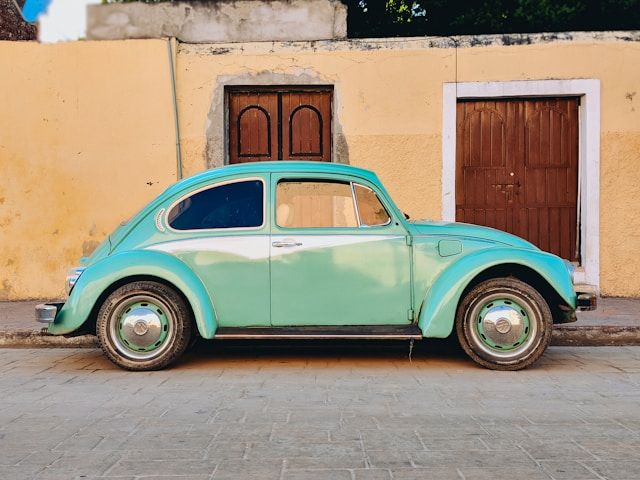

In [9]:
# URL of the image you want to classify
url = "https://unsplash.com/photos/xBRQfR2bqNI/download?ixid=MnwxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjc4Mzg4ODEx&force=true&w=640"
url2= "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTW-ZDo6dn0xY3dzUY7oInTwNNjk6ugbnlp-w&s"

# Open the image from the URL using the requests library and PIL
image = Image.open(requests.get(url, stream=True).raw)

# Display Image
image

In [27]:
# List of candidate labels for classification
candidate_labels = ["tree", "car", "bike", "cat"]

# Prepare inputs for the zero-shot image classification model
inputs = processor(images=image, text=candidate_labels, return_tensors="pt", padding=True)

# Print the contents of the inputs dictionary
print(inputs.keys())

dict_keys(['input_ids', 'attention_mask', 'pixel_values'])


## Task 6: Zero-shot Image Classification - Generate Predictions

In the previous task, we learned to prepare the inputs for zero-shot image classification task. In this task, we will learn to generate predictions for the zero-shot image classification task using the pre-trained model and the prepared inputs. <br>

We use `torch.no_grad()` to perform inference with the model. The `model(**inputs)` line is used to pass the prepared inputs to the model, and the outputs are stored in the outputs variable. We use `outputs.logits_per_image[0]` to extract the logits (raw scores) for the image from the model's outputs. We use `logits.softmax(dim=-1).numpy()` to calculate the softmax probabilities from the logits and converts them to a NumPy array. We use `probs.tolist()` to convert the probabilities to scores as a list. These scores represent the model's confidence in each candidate label. Finally, we create a list called `result` that contains dictionaries with `"score"` and `"label"` keys. Each dictionary represents a candidate label along with its corresponding score. The list is sorted in descending order of scores using the sorted function and a lambda function as the sorting key. This produces a ranked list of labels based on the model's confidence scores.

### Instructions

Generate Predictions

- Import Pytorch
- Perform inference with the model
- Extract logits and calculate probabilities
- Convert probabilities to scores as a list
- Create a list of results, sorted by scores in descending order

In [28]:
# Import Pytorch
import torch 

# Perform inference with the model
with torch.no_grad():
    outputs = model(**inputs)
# Extract logits and calculate probabilities
logits = outputs.logits_per_image[0]
probs = logits.softmax(dim=-1).numpy()

print(probs)

# Convert probabilities to scores as a list
scores = probs.tolist()


# Create a list of results, sorted by scores in descending order
result = [
    {"score": score, "label": candidate_label}
    for score, candidate_label in sorted(zip(probs, candidate_labels), key=lambda x: -x[0])
]

# Display result
result

[2.6455591e-04 9.9886608e-01 8.3806721e-04 3.1306412e-05]


[{'score': 0.9988661, 'label': 'car'},
 {'score': 0.0008380672, 'label': 'bike'},
 {'score': 0.0002645559, 'label': 'tree'},
 {'score': 3.1306412e-05, 'label': 'cat'}]

## Task 7: Zero-shot Object Detection - Loading Model

In the previous task, we learned about zero-shot image classification task using pre-trained models. In this task, we will learn to load pre-trained models for zero-shot object detection task. In many practical situations, there are object categories that are rare or seldom encountered in training data. Zero-shot detection allows models to recognize and locate such infrequent objects effectively.<br>

We load the necessary classes from the transformers library to work with a pre-trained model for zero-shot object detection. In this case, we load "google/owlvit-base-patch32" checkpoint, which is associated with the Owl-ViT (Object-World Learning Vision Transformer) model with a base architecture and a patch size of 32x32. We use this model because it has smaller patch size, which means it is suitable for detecting small objects or fine-grained details within larger images. Also, models that work with small patches may have been pre-trained on a large dataset, which means we can fine-tune such models on your specific object detection task with relatively small amounts of annotated data.<br> 

We load the processors, which are responsible for tokenizing and preprocessing inputs to make them compatible with the model. In this case, we're using the `AutoProcessor` to handle text inputs and image inputs for zero-shot object detection. With these components initialized, we can now use this pre-trained model and processor to perform zero-shot object detection, where the model can detect objects in images based on textual descriptions or labels, even if it has never seen those objects during training.

### Instructions

Loading Model

- Import classes from the transformers library to work with a pre-trained model   
- Specify the checkpoint name or identifier for the pre-trained model you want to use
- Initialize the pre-trained model for zero-shot object detection
- Initializes the processor associated with the same pre-trained model

In [1]:
# Import classes from the transformers library to work with a pre-trained model 
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection

# Specify the checkpoint name or identifier for the pre-trained model you want to use
checkpoint = "google/owlvit-base-patch32"

# Initialize the pre-trained model for zero-shot object detection
model = AutoModelForZeroShotObjectDetection.from_pretrained(checkpoint)

# Initializes the processor associated with the same pre-trained model
processor = AutoProcessor.from_pretrained(checkpoint)

Downloading:   0%|          | 0.00/392 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/775 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

## Task 8: Zero-shot Object Detection - prepare the inputs for the model

In the previous task, we learned to load pre-trained models for zero-shot object detection task. In this task, we will learn to prepare the inputs for zero-shot object detection task using an image and list of textual queries. We will use `processor` function that will accept three aruments:<br>
    1. `text=imtext_queries`:  The text parameter is used to provide the list of textual queries describing objects we want the model to detect in the image. <br>
    2. `images=im`: You pass the image you loaded earlier to the images parameter, providing the image to the model for object detection.<br> 3. `return_tensors="pt"`: This specifies that you want the inputs to be returned as PyTorch tensors.<br>

### Instructions

Prepare the inputs for the model 

- URL of the image you want to classify  
- Open the image from the URL using the requests library and PIL
- Display Image
- List of textual queries describing objects
- Prepare inputs for zero-shot object detection

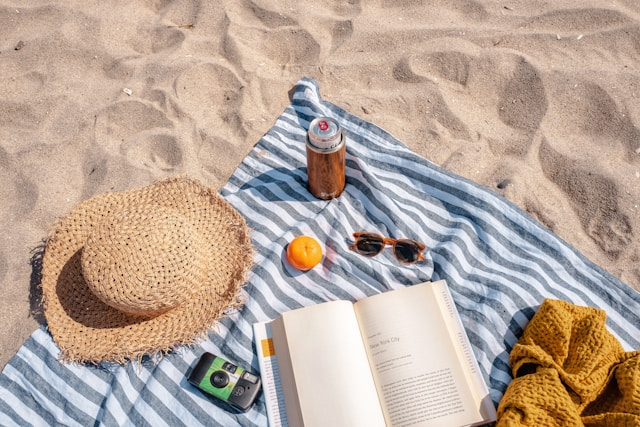

In [4]:
# URL of the image you want to analyze
url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"

# Open the image from the URL using the requests library and PIL
im = Image.open(requests.get(url, stream=True).raw)

# Display Image
im

In [5]:
# List of textual queries describing objects
text_queries = ["hat", "book", "sunglasses", "camera"]

# Prepare inputs for zero-shot object detection
inputs = processor(text=text_queries, images=im, return_tensors="pt")

## Task 9: Zero-shot Object Detection - Visualize the Results

In the previous task, we learned to prepare the inputs for zero-shot object detection task. In this task, we will learn to perform zero-shot object detection on the provided image and add bounding boxes and labels to the detected objects. <br>

We use `torch.no_grad()` to perform inference with the model, similar to previous tasks. The `model(**inputs)` line is used to pass the prepared inputs to the model, and the outputs are stored in the outputs variable. We create a tensor that specifies the `target sizes` of the images (in this case, the size of the input image). We use `processor.post_process_object_detection()` function to post-process the object detection results from the model. We create a drawing object (`draw`) for the image using `ImageDraw.Draw(im)`. Finally, you iterate over the detected objects and draw bounding boxes using `draw.rectangle()` function and add a text label to each bounding box using `draw.text()` function. 

## Instructions

Visualize the Results

- Perform inference with the model  
- Create a drawing object for the image
- Extract detection results (scores, labels, and bounding boxes)
- Iterate over detected objects and draw bounding boxes and labels
- Display the image with bounding boxes and labels

In [10]:
# From PIL import the ImageDraw function
from PIL import ImageDraw

# Perform inference with the model
with torch.no_grad():
    outputs = model(**inputs)
    target_sizes = torch.tensor([im.size[::-1]])
    print("target_sizes",target_sizes)
    results = processor.post_process_object_detection(outputs, threshold=0.1, target_sizes=target_sizes)[0]
    print("results",results)

# Create a drawing object for the image
draw = ImageDraw.Draw(im)

target_sizes tensor([[427, 640]])
results {'scores': tensor([0.2589, 0.1123, 0.1850]), 'labels': tensor([2, 0, 1]), 'boxes': tensor([[349.7605, 228.7376, 430.0121, 265.0326],
        [ 39.3991, 173.2859, 260.1198, 363.5247],
        [270.1139, 284.1325, 502.3337, 427.4663]])}


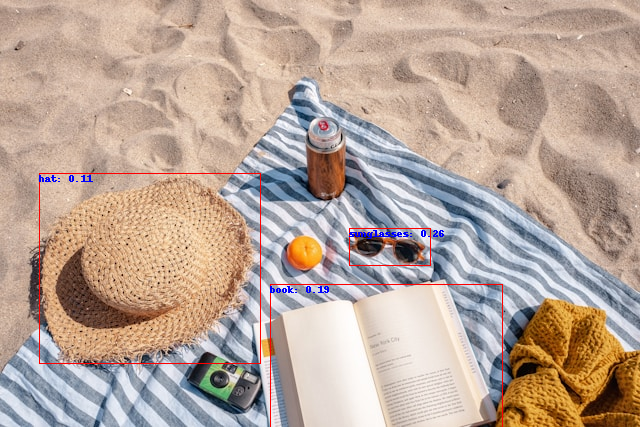

In [17]:
# Extract detection results (scores, labels, and bounding boxes)
scores = results["scores"].tolist()
labels = results["labels"].tolist()
boxes = results["boxes"].tolist()

# Iterate over detected objects and draw bounding boxes and labels
for box, score, label in zip(boxes, scores, labels):
    xmin, ymin, xmax, ymax = box
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{text_queries[label]}: {round(score,2)}", fill="blue")

# Display the image with bounding boxes and labels
im

## Summary

You seen how to use visual transformer models and Hugging Face packages to perform the following tasks.

- You used image classification to get a text description of an object in an image.
- You saw how zero-shot image classification can guess the contents of images without you providing similar examples.
- You used image detection to find the location of objects within images.